In [1]:
import util
from util import *

In [2]:
#name='LiH_2000'
#name='H4_2000'
name='H4_100'
#name='C_2000'
#name='N2_10000'

system=name.split('_')[0]
logdir='vmcdata/{}'.format(name)
evaldir=logdir

smoothing=1000

runs=dict()

for r in os.listdir(logdir):
    try:
        runs[r]=cleanlabel(util.getconfig(logdir,r)['notes'])
    except:
        pass
runs=filter_runs(runs,[('prox','kfac')])
ref=util.reference_energies[system]

runs

{'kfac_0.005': 'H4 kfac 0.005 ',
 'kfac_0.01': 'H4 kfac 0.01 ',
 'kfac_0.02': 'H4 kfac 0.02 ',
 'kfac_0.05': 'H4 kfac 0.05 ',
 'kfac_0.10': 'H4 kfac 0.10 ',
 'kfac_0.20': 'H4 kfac 0.20 ',
 'kfac_0.50': 'H4 kfac 0.50 ',
 'kfac_1.00': 'H4 kfac 1.00 ',
 'proxsr_0.005': 'H4 proxsr 0.005 ',
 'proxsr_0.01': 'H4 proxsr 0.01 ',
 'proxsr_0.02': 'H4 proxsr 0.02 ',
 'proxsr_0.05': 'H4 proxsr 0.05 ',
 'proxsr_0.10': 'H4 proxsr 0.10 ',
 'proxsr_0.50': 'H4 proxsr 0.50 ',
 'proxsr_1.00': 'H4 proxsr 1.00 '}

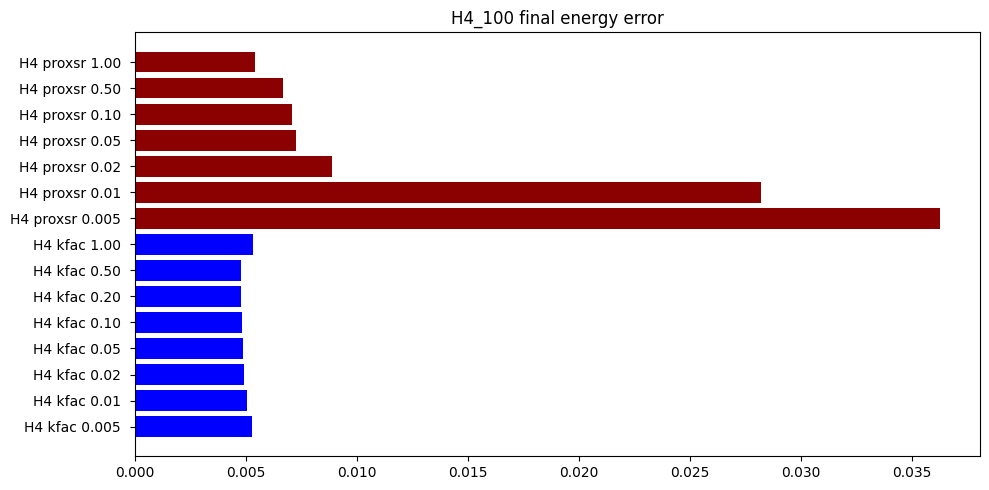

In [3]:
labels=[cleanlabel(n) for r,n in runs.items()]
errors=[getevalenergy(evaldir,r)-ref for r in runs]
colors=[get_optimizer_color(n) for r,n in runs.items()]
 

#labels=['unfinished' if e==-1 else cleanlabel(n) for e,n in zip(errors,runs.values())]

plt.figure(figsize=(10,5))
plt.title(name+' final energy error')
plt.barh(labels,errors,color=colors)
#plt.xscale('log')
plt.tight_layout()
savefig('plots/sweep/'+name)